**Привет!**

Меня зовут Матушевич Ольга, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий тимлида:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий тимлида:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

### Описание проекта

#### Задача:

Оцените эффективность магазинов сети.

- Проведите исследовательский анализ данных;
- Оцените эффективность;
- Сформулируйте и проверьте статистические гипотезы.

### Содержание <a id='contents'></a>

1. [Шаг 1. Загрузка и предобработка данных](#step1)
    * [Загрузка данных и вывод общей информации о датафреймах](#step1.1)
    * [Переименование признаков](#step1.2)
    * [Исследование и замена пропущенных значений](#step1.3)
    * [Исследование типов данных на соответствие и их замена](#step1.4)
    * [Поиск и удаление дубликатов](#step1.5)<br>
    <br>    
2. [Шаг 2. Исследовательский анализ данных (EDA)](#step2)
    * [Работа с выбросами](#step2.1)
    * [Рассчитать выручку по магазинам, найти Топ 10 магазинов по выручке, построить графики](#step2.2)
    * [Рассчитать средний чек по магазинам, найти Топ 10 магазинов по среднему чеку, построить графики](#step2.3)
    * [Рассчитать среднее кол-во товаров (SKU) в чеке по магазинам, построить графики](#step2.4)
    * [Рассчитать среднее кол-во возвратов по магазинам, построить графики](#step2.5)
    * [Общие выводы по ключевым показателям](#step2.6)<br>
    <br>
3. [Шаг 3. Проверка гипотез влияния участия в программе лояльности на ключевые показатели](#step3)
    * [Разделить все магазины на две группы (по участию в программе лояльности)](#step3.1)
    * [Определить, есть ли различие в среднем чеке для каждой группы](#step3.2)
    * [Определить, есть ли различие в кол-ве SKU в чеке для каждой группы](#step3.3)
    * [Определить, если ли различие в среднем кол-ве покупок для групп](#step3.4)
    * [Сделать выводы: как программа лояльности влияет на эффективность магазинов](#step3.5)<br>
    <br>
4. [Шаг 4. Общие выводы по работе](#step4)
5. [Презентация](https://yadi.sk/d/IZ0Zy6audDDx2A) 
6. [Дашборд:](https://public.tableau.com/profile/denis5469#!/vizhome/Retail_dash/Dashboard1?publish=yes) 

<div class="alert alert-success">
<b>Комментарий тимлида v2:</b> Хорошая минималистичная презентация. Дашборд соотвествует всем требованиям, но дни без продаж отображены не очень удачно: в идеале на их месте должны быть столбики нулевой высоты, а у тебя просто удалены эти даты. Это не идеальное, но допустимое решение.

</div>

### Шаг 1. Загрузка и предобработка данных <a id='step1'></a>
[К содержанию](#contents)

#### Загрузка данных и вывод общей информации о датафреймах <a id='step1.1'></a>

Импортируем необходимые библиотеки и настройки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
sns.set(rc = {'figure.figsize':(15, 8)}) #размеры графика для seaborn
import warnings
warnings.filterwarnings('ignore') #отключим вывод предупреждений python
from scipy import stats as st
from termcolor import colored

In [2]:
#округление чисел float до двух знаков после запятой
pd.options.display.float_format = '{:.2f}'.format

Загрузим исходные данные:

In [3]:
retail = pd.read_csv('/datasets/retail_dataset.csv')
codes = pd.read_csv('/datasets/product_codes.csv')

Ознакомимся с датафреймами и выведем общую информацию о них:

In [4]:
display(retail.head())
display(retail.info())

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.00,Shop 0,0.00
1,538862,22195,0,2016-12-14 14:11:00,22389.00,Shop 0,1.00
2,538855,21239,7,2016-12-14 13:50:00,22182.00,Shop 0,1.00
3,543543,22271,0,2017-02-09 15:33:00,23522.00,Shop 0,1.00
4,543812,79321,0,2017-02-13 14:40:00,23151.00,Shop 0,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
ShopID             105335 non-null object
loyalty_program    105335 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


None

Датасет содержит следующие признаки:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

In [5]:
display(codes.head())
display(codes.info())

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
productID        9969 non-null object
price_per_one    9969 non-null float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


None

В датасете находится следующая информация:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

#### Переименование признаков <a id='step1.2'></a>

Для удобства дальнейшей работы переименуем признаки в датафреймах. Приведем их к нижнему регистру, добавим нижние подчеркивания, уберем пробелы.

In [6]:
retail.columns

Index(['purchaseid', 'item_ID', 'Quantity', 'purchasedate', 'CustomerID',
       'ShopID', 'loyalty_program'],
      dtype='object')

Смысла пользоваться различными методами не вижу (например, str.lower), все равно вручную добавлять подчеркивания. Признак 'item_id' переименуем в 'product_id' для удобства дальнейшего объединения таблиц.

In [7]:
#воспользуемся самым быстрым методом, так как список колонок у нас уже есть
retail.columns = ['purchase_id', 'product_id', 'quantity', 'purchase_date', 'customer_id',
       'shop_id', 'loyalty_program']
retail.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.00,Shop 0,0.00
1,538862,22195,0,2016-12-14 14:11:00,22389.00,Shop 0,1.00
2,538855,21239,7,2016-12-14 13:50:00,22182.00,Shop 0,1.00
3,543543,22271,0,2017-02-09 15:33:00,23522.00,Shop 0,1.00
4,543812,79321,0,2017-02-13 14:40:00,23151.00,Shop 0,1.00


In [8]:
codes.columns

Index(['productID', 'price_per_one'], dtype='object')

In [9]:
codes.columns = ['product_id', 'price_per_one']
codes.head()

,product_id,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


<div class="alert alert-danger">
<b>Комментарий тимлида:</b> Я не вижу проверку на дубликаты - стоит ее сделать. </div>

#### Исследование и замена пропущенных значений <a id='step1.3'></a>

Воспользуемся функцией для вывода пропущенных значений по признакам и их процентного отношения. Заодно взглянем на типы данных:

In [10]:
def missing_info(data):
    """
    функция, выводящая информацию о количестве пропусков по признакам, их процентном соотношении и типах данных по признакам
    
    """
    #переменная, содержащая в себе количество пропусков по каждому признаку, значения отсортированы по убыванию
    total = data.isnull().sum().sort_values(ascending = False)
    #процент пропусков от общего количества записей в признаке
    percent = ((data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)) * 100
    #объединяем в одну табличку и дадим название столбцам
    missing_data = pd.concat([total, percent], axis = 1, keys = ['total missing values', 'percent %'])
    #добавим столбец с типом данных каждого признака
    missing_data['dtype'] = data.dtypes
    return missing_data

display(missing_info(retail))
display(missing_info(codes))

,total missing values,percent %,dtype
customer_id,36210,34.38,float64
loyalty_program,0,0.00,float64
shop_id,0,0.00,object
purchase_date,0,0.00,object
quantity,0,0.00,int64
product_id,0,0.00,object
purchase_id,0,0.00,object


,total missing values,percent %,dtype
price_per_one,0,0.00,float64
product_id,0,0.00,object


<div class="alert alert-success">
<b>Комментарий тимлида:</b> Отличная функция.</div>

Пропущенные значения присутствуют только в признаке 'customer_id' с id покупателя датафрейма retail. Возможно, что в некоторых чеках указан 'customer_id' для первой покупки, тогда можно будет заполнить многие NaN. Проверим это.

Ознакомимся с записями, где есть пропущенные 'customer_id':

In [11]:
retail.loc[retail['customer_id'].isnull()]

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
6,540468,22189,0,2017-01-07 13:55:00,nan,Shop 0,0.00
7,541424,79321,1,2017-01-17 17:57:00,nan,Shop 0,0.00
8,538883,22891,0,2016-12-14 15:56:00,nan,Shop 0,0.00
11,541696,22197,4,2017-01-20 18:08:00,nan,Shop 0,0.00
16,539744,22300,5,2016-12-21 15:21:00,nan,Shop 0,0.00
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,nan,Shop 0,0.00
105326,540681,22227,1,2017-01-10 16:25:00,nan,Shop 0,0.00
105327,538349,22625,0,2016-12-10 14:59:00,nan,Shop 0,0.00
105329,540154,22134,3,2017-01-05 11:30:00,nan,Shop 0,0.00


Проверим, сколько уникальных id чеков содержится в выборке:

In [12]:
print('Уникальных чеков:', retail.loc[retail['customer_id'].isnull()]['purchase_id'].nunique())

Уникальных чеков: 748


Составим список чеков ('purchase_id') с пропущенными значениями 'customer_id':

In [13]:
purchase_list = retail.loc[retail['customer_id'].isnull()]['purchase_id']

Проверим, сколько записей с данными чеками содержатся в датафрейме:

In [14]:
retail.loc[retail['purchase_id'].isin(purchase_list)]

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
6,540468,22189,0,2017-01-07 13:55:00,nan,Shop 0,0.00
7,541424,79321,1,2017-01-17 17:57:00,nan,Shop 0,0.00
8,538883,22891,0,2016-12-14 15:56:00,nan,Shop 0,0.00
11,541696,22197,4,2017-01-20 18:08:00,nan,Shop 0,0.00
16,539744,22300,5,2016-12-21 15:21:00,nan,Shop 0,0.00
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,nan,Shop 0,0.00
105326,540681,22227,1,2017-01-10 16:25:00,nan,Shop 0,0.00
105327,538349,22625,0,2016-12-10 14:59:00,nan,Shop 0,0.00
105329,540154,22134,3,2017-01-05 11:30:00,nan,Shop 0,0.00


Получили все те же 36210 записей. Предположение оказалось неверным. В приниципе, для нашего исследования эти пропуски не столь важны, удалять записи с ними очень нежелательно, поэтому заменим пропущенные id покупателей на единицы.

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Очень хорошо, что ты проверяешь свои предположения на данных. </div>

In [15]:
#заполним пропущенные значения методом fillna с аргументом 1
retail['customer_id'] = retail['customer_id'].fillna(1)
retail['customer_id'].value_counts()

1.00        36210
18427.00      796
23520.00      757
20285.00      751
20990.00      718
            ...  
22444.00        1
23872.00        1
19769.00        1
22986.00        1
21432.00        1
Name: customer_id, Length: 1750, dtype: int64

#### Исследование типов данных на соответствие и их замена <a id='step1.4'></a>

Еще раз вызовем функцию missing_info:

In [16]:
display(missing_info(retail))

,total missing values,percent %,dtype
loyalty_program,0,0.00,float64
shop_id,0,0.00,object
customer_id,0,0.00,float64
purchase_date,0,0.00,object
quantity,0,0.00,int64
product_id,0,0.00,object
purchase_id,0,0.00,object


Пропущенные значения исчезли.

По типам данным много неточностей. Стоит заменить типы в столбцах:
- 'loyalty_program' на int
- 'customer_id' на int
- 'purchase_date' на datetime
- 'item_id' на int (стоит проверить, возможно ли это)
- 'purchase_id' на int (аналогично требует проверки)

In [17]:
#применим метод astype()
retail['loyalty_program'] = retail['loyalty_program'].astype('int')
retail['customer_id'] = retail['customer_id'].astype('int')
#применим функцию pd.to_datetime для замены типа данных на дату
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'], format = '%Y-%m-%d %H:%M:%S')

Проверим значения столбца 'item_id':

In [18]:
#используем метод value_counts на датафрейме
retail['product_id'].value_counts()

85123A    565
22423     499
22469     414
22720     377
85099B    372
         ... 
20906       1
35609A      1
84691       1
20666       1
84968d      1
Name: product_id, Length: 3159, dtype: int64

Много значений id покупки с буквенными индексами. Скорее всего, это составляющие части каких-то комплектов изделий. Оставим, как есть.

Аналогично проверим 'purchase_id':

In [19]:
retail['purchase_id'].sort_values()

32942     536365
69816     536365
54945     536365
32454     536365
15498     536365
          ...   
18394    C545033
8998     C545033
88377    C545040
84684    C545068
15479    C545189
Name: purchase_id, Length: 105335, dtype: object

Посмотрим на значения с префиксом 'C' в номере чека:

In [20]:
retail.sort_values(by = 'purchase_id', ascending = False).head()

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
15479,C545189,47594B,-2,2017-02-28 15:19:00,23520,Shop 0,1
84684,C545068,84247K,-12,2017-02-27 15:07:00,19836,Shop 0,0
88377,C545040,22183,-2,2017-02-27 10:25:00,19363,Shop 0,0
8998,C545033,22838,-97,2017-02-25 16:26:00,19835,Shop 6,0
11484,C545033,22936,-73,2017-02-25 16:26:00,19835,Shop 6,0


Судя по всему, префикс 'C' в номере чека означает, что это возврат. Удостоверимся, что кроме буквы 'С' другие буквы не используются:

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Да, это вполне возможно.</div>

In [21]:
retail.loc[retail['purchase_id'].str.contains('[A-Z]+'), :]

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
64,C539944,22776,-2,2016-12-23 11:38:00,20239,Shop 0,0
109,C542910,20726,-2,2017-02-01 15:38:00,23190,Shop 0,1
112,C542426,22418,-25,2017-01-28 09:32:00,19825,Shop 0,0
253,C539726,22791,-11,2016-12-21 14:24:00,22686,Shop 0,1
344,C544034,21878,-2,2017-02-15 11:28:00,20380,Shop 0,0
...,...,...,...,...,...,...,...
105160,C541650,M,-2,2017-01-20 11:44:00,1,Shop 0,0
105172,C540246,79320,-2,2017-01-05 15:43:00,18760,Shop 0,0
105211,C539467,22801,-2,2016-12-19 12:46:00,20723,Shop 0,0
105250,C540847,22197,-3,2017-01-11 17:35:00,19137,Shop 0,0


Проверим, не дублируются ли id возвратов с id покупок без префикса 'C':

In [22]:
#применим функцию lambda для удаления префикса С во всех строках датафрейма
return_list = retail.loc[retail['purchase_id'].str.contains('[A-Z]+'), :]['purchase_id'].apply(lambda x: x.strip('C'))
return_list.head()

64     539944
109    542910
112    542426
253    539726
344    544034
Name: purchase_id, dtype: object

In [23]:
retail[retail['purchase_id'].isin(return_list)]

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program


Пустой список, индексы не дублируются, можно удалить префиксы и изменить тип данных. Смысла в индексах не вижу, для фильтрации возвратов проще использовать логическую индексацию или срезы. Возможно, изменение типа данных, это будет удобно в дальнейшем. Но не факт, что пригодится.

In [24]:
retail['purchase_id'] = retail['purchase_id'].apply(lambda x: x.strip('C'))
retail['purchase_id'] = retail['purchase_id'].astype('int')

#### Поиск и удаление дубликатов <a id='step1.5'></a>

Найдем кол-во дубликатов в датафрейме:

In [25]:
#воспользуемся методом sum()
retail.duplicated().sum()

1033

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Ага, вот оно. Претензия выше снимается.</div>

Посмотрим на эти строки:

In [26]:
retail.loc[retail.duplicated(), :]

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
5345,537265,21499,24,2016-12-06 11:26:00,21598,Shop 0,0
5863,540803,21485,0,2017-01-11 12:30:00,20348,Shop 0,0
6893,540524,21326,11,2017-01-09 12:53:00,22414,Shop 0,1
7821,537192,22585,0,2016-12-05 13:42:00,22081,Shop 0,1
10806,537772,22080,4,2016-12-08 12:35:00,23722,Shop 0,1
...,...,...,...,...,...,...,...
105164,542224,22178,5,2017-01-26 12:45:00,23567,Shop 0,1
105173,544153,82552,1,2017-02-16 12:11:00,21035,Shop 0,0
105178,540839,21123,0,2017-01-11 15:42:00,22470,Shop 0,1
105229,543277,21533,0,2017-02-06 14:33:00,21487,Shop 0,0


Дубликаты стоит удалить, крайне сомнительно, что в одном чеке товары в одним 'item_id' оказались несгруппированы. Да еще и кол-во дважды совпало.

In [27]:
retail.drop_duplicates(inplace = True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
purchase_id        104302 non-null int64
product_id         104302 non-null object
quantity           104302 non-null int64
purchase_date      104302 non-null datetime64[ns]
customer_id        104302 non-null int64
shop_id            104302 non-null object
loyalty_program    104302 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 6.4+ MB


Заодно добавим дату покупки, это должно быть удобнее, чем использовать дату со временем:

In [28]:
retail['date'] = retail['purchase_date'].values.astype('datetime64[D]')

Сбросим индекс у датафрейма retail и проверим получившийся результат:

In [29]:
retail.reset_index(drop = True, inplace = True)
retail

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13
...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,1,Shop 0,0,2016-12-13
104298,540247,21742,0,2017-01-05 15:56:00,21143,Shop 0,0,2017-01-05
104299,538068,85048,1,2016-12-09 14:05:00,23657,Shop 0,1,2016-12-09
104300,538207,22818,11,2016-12-10 11:33:00,18427,Shop 0,0,2016-12-10


Проверим датафрейм codes:

In [30]:
codes.duplicated().sum()

0

Дубликатов нет, пропущенных значений, как выяснили ранее, тоже. Типы данных изначально корректны.

### Вывод

#### Шаг 2. Исследовательский анализ данных (EDA) <a id='step2'></a>
[К содержанию](#contents)

#### Работа с выбросами <a id = 'step2.1'></a>

Ознакомимся с данными датафрейма retail при помощи метода describe. На самом деле, нас интересует только столбец 'quantity' с кол-вом проданного товара в чеке, описание id клиентов, товаров и чеков в данном случае неинформативны:

In [31]:
#использвуем метод describe()
retail['quantity'].describe()

count   104302.00
mean         7.88
std        329.57
min     -74216.00
25%          0.00
50%          2.00
75%          7.00
max      74214.00
Name: quantity, dtype: float64

Получили неадекватно высокое и низкое минимальное и макимальное кол-во товаров (похоже кто-то купил огромное кол-во гвоздей и вернул их). Странно, что существует такое количество штучного товара, обычно мелкий товар продается в упаковках или на развес.

Напишем функцию для автоматизации построения гистограммы и диаграммы размаха для различных признаков:

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Да, скорее всего был быстрый возврат после неудачной покупки.</div>

In [32]:
retail['quantity'].value_counts()

 0       32362
 1       16137
 11      10265
 5        7931
 2        7444
         ...  
-32          1
 1823        1
 1055        1
 1151        1
 863         1
Name: quantity, Length: 301, dtype: int64

Построим диаграмму размаха:

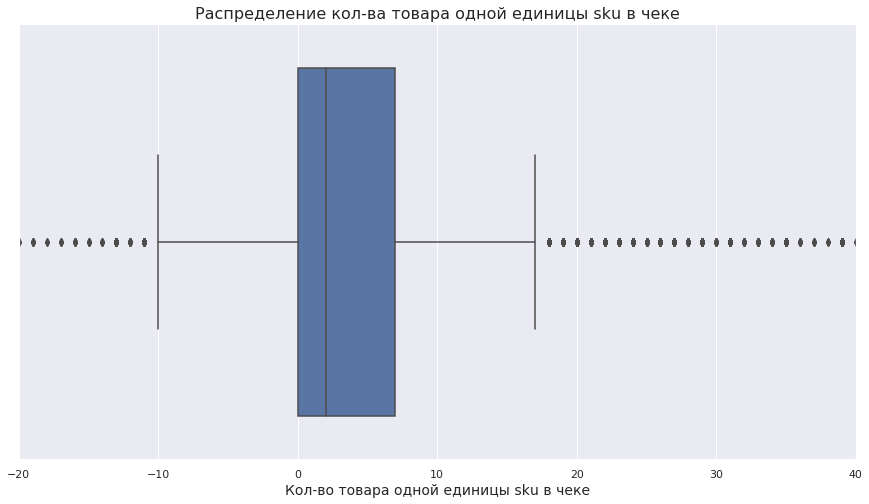

In [33]:
#диаграмма размаха из библиотеки seaborn
ax = sns.boxplot(retail['quantity'])
ax.set(xlim = (-20, 40)) #установим диапазон отображаемых значений по оси x
ax.set_title('Распределение кол-ва товара одной единицы sku в чеке', fontsize = 16)
plt.xlabel('Кол-во товара одной единицы sku в чеке', fontsize = 14);

Найдем первый и третий квартили и межквартильный размах:

In [34]:
Q1 = retail['quantity'].quantile(0.25)
Q3 = retail['quantity'].quantile(0.75)
IQR = Q3 - Q1
print('Первый квартиль: {:.0f}'.format(Q1))
print('Третий квартиль: {:.0f}'.format(Q3))
print('Межквартильный размах: {:.0f}'.format(IQR))

Первый квартиль: 0
Третий квартиль: 7
Межквартильный размах: 7


Очень большое число "нулевых" количеств товаров. Это могут быть и акции (товар в подарок), разбивка в чеке товаров на комплектующие, просто ошибки системы. Эти товары стоит оставить, при удалении изменится кол-во sku в чеке.

Так как хвосты у распределений длинные, примем за выбросы наблюдения, выходящие за 3 IQR от Q1 и Q3:

In [35]:
print('Верхний порог: {:.0f} единиц'.format(Q3 + 3*IQR))

Верхний порог: 28 единиц


За нижний порог логично взять верхний с отрицательным знаком - вернули-то те же купленные товары, что мы отбросим.
Примем эти пороги равными 30 и -30 единицам:

In [36]:
retail_filtered = retail.query('quantity > -30 & quantity < 30')
retail_filtered

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13
...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,1,Shop 0,0,2016-12-13
104298,540247,21742,0,2017-01-05 15:56:00,21143,Shop 0,0,2017-01-05
104299,538068,85048,1,2016-12-09 14:05:00,23657,Shop 0,1,2016-12-09
104300,538207,22818,11,2016-12-10 11:33:00,18427,Shop 0,0,2016-12-10


Удалили около 5% записей, это достаточно много. Дальнейшую работу исследовательского анализа продолжим по исходному датафрейму. "Очищенный" будем использовать при статистической проверке гипотез.

<div class="alert alert-warning">
<b>Комментарий тимлида:</b> Мне очень близок твой бережный подход к данным - но я бы советовала пользоваться далее только очищенным датафреймом. В том числе и для измерения эффективности магазинов.

Кстати, отличная работа с выбросами.
</div>

Далее рассмотрим датафрейм codes:

In [37]:
codes.head()

,product_id,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [38]:
codes.describe()

,price_per_one
count,9969.00
mean,19.50
std,330.88
min,0.00
25%,1.25
50%,2.55
75%,5.51
max,16888.02


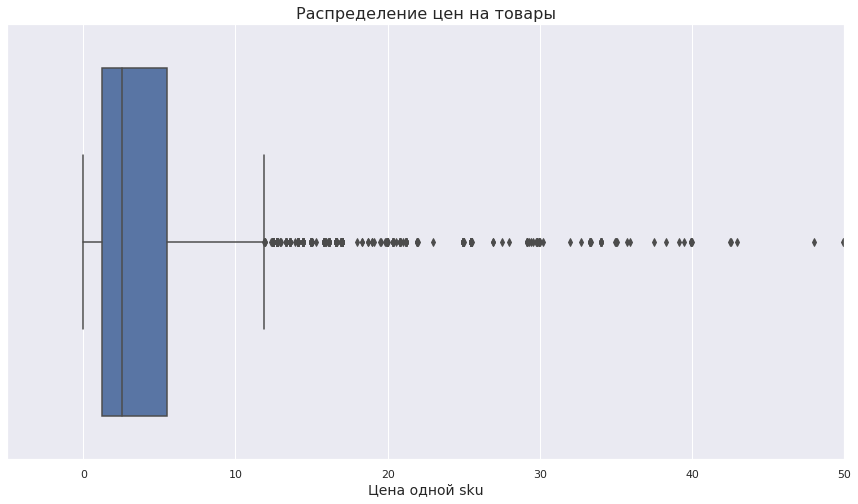

In [39]:
ax = sns.boxplot(codes['price_per_one'])
ax.set(xlim = (-5, 50))
ax.set_title('Распределение цен на товары', fontsize = 16)
plt.xlabel('Цена одной sku', fontsize = 14);

Есть "нулевые" цены на товар. Рассмотрим подробнее:

In [40]:
codes['price_per_one'].value_counts()

1.25      504
0.85      493
0.00      382
2.51      371
2.46      329
         ... 
109.84      1
12.99       1
14.96       1
950.99      1
223.35      1
Name: price_per_one, Length: 586, dtype: int64

Много нулевых цен, возможно, это - цены по акции, или подарок в комплекте с другим товаром.
Проверим соответствие кол-ва цен кол-ву товаров:

In [41]:
print('Кол-во записей с ценами: {:}'.format(codes['price_per_one'].count()))
print('Кол-во уникальных товаров: {:}'.format(codes['product_id'].nunique()))

Кол-во записей с ценами: 9969
Кол-во уникальных товаров: 3159


Видим, что для некоторых товаров существует не одна цена. Возьмем случайный 'product_id', посмотрим на список цен для него:

In [42]:
codes.loc[codes['product_id'] == '21791']

,product_id,price_per_one
32,21791,1.25
837,21791,2.51
2084,21791,1.06
5806,21791,0.00
7349,21791,2.46


Так как нет связи между изменения цен на товары и датами, вижу единственный рабочий вариант - усреднить цену по каждому товару и использовать ее. Это несколько исказит результаты исследования, но это - оптимальный вариант.

In [43]:
codes_mean = codes.groupby('product_id').agg(mean_price = ('price_per_one', 'mean')).reset_index()
codes_mean.head()

,product_id,mean_price
0,10002,1.38
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


Также существуют выбросы - слишком высокие цены на товар. Максимальное значение - почти 17000 при среднем в 20. Посмотрим на товары с ценой выше 100 у.е.:

In [44]:
codes_mean.loc[codes_mean['mean_price'] > 100]

,product_id,mean_price
1507,22655,228.50
1508,22656,150.00
1668,22823,117.50
1671,22826,175.00
1672,22827,155.00
1673,22828,155.00
3136,AMAZONFEE,9268.76
3137,BANK CHARGES,385.95
3150,DOT,278.73
3151,M,253.77


In [45]:
retail.loc[retail['product_id'].isin(['AMAZONFEE', 'BANK CHARGES', 'DOT'])].head(10)

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date
208,538153,DOT,0,2016-12-09 16:31:00,1,Shop 0,0,2016-12-09
1071,537643,DOT,0,2016-12-07 15:34:00,1,Shop 0,0,2016-12-07
1181,537652,AMAZONFEE,-2,2016-12-07 15:51:00,1,Shop 0,0,2016-12-07
1514,544575,BANK CHARGES,-2,2017-02-21 13:58:00,1,Shop 0,0,2017-02-21
1809,541830,DOT,0,2017-01-21 17:09:00,1,Shop 0,0,2017-01-21
2192,543201,DOT,0,2017-02-04 13:03:00,1,Shop 0,0,2017-02-04
2206,541496,DOT,0,2017-01-18 15:00:00,1,Shop 0,0,2017-01-18
2637,544589,AMAZONFEE,-2,2017-02-21 15:11:00,1,Shop 0,0,2017-02-21
2689,539737,DOT,0,2016-12-21 15:19:00,1,Shop 0,0,2016-12-21
2922,542664,DOT,0,2017-01-31 12:14:00,1,Shop 0,0,2017-01-31


Как видим, товары DOT в большинстве своем с нулевым кол-вом, манипуляции с ними мало что изменят. Выплаты Amazon (выдача, хранение товаров и прочее, похоже, что наш магазин сотрудничает с Amazon) я бы удалять не стал, обычно это - регулярные выплаты, и они должны вычитаться для расчета среднего чека и дохода. Аналогично и банковские сборы.

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Очень подробный анализ.</div>

#### Рассчитать выручку по магазинам, найти Топ 10 магазинов по выручке, построить графики <a id='step2.2'></a>

Для начала объединим датафреймы retail и codes. Сразу добавим столбец с суммарной стоимостью покупки по каждому типу товаров:

In [46]:
#объединим таблицы при помощи функции pd.merge() по столбцу 'product_id', сохраник все записи retail
retail_data = pd.merge(retail, codes_mean, on = 'product_id', how = 'left')
#добавим столбец суммы проданных товаров в пределах одной sku в чеке
retail_data['buy_sum'] = retail_data['quantity'] * retail_data['mean_price']
retail_data.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.81,19.91
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.77,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.47,10.32
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.30,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.01,0.00


Проверим длину получившейся таблицы:

In [47]:
#используем метод shape
display(retail.shape)
display(retail_data.shape)

(104302, 8)

(104302, 10)

На первый взгляд, все верно.

Получим сводную таблицу по магазинам с суммарной выручкой по каждому:

In [48]:
#группировка методом groupby по id магазина
revenue_grouped = retail_data.groupby('shop_id').agg(revenue = ('buy_sum', 'sum'))
revenue_grouped = revenue_grouped.sort_values(by = 'revenue', ascending = False).round(2).head(10).reset_index()
revenue_grouped

,shop_id,revenue
0,Shop 0,1573475.31
1,Shop 3,103976.00
2,Shop 6,56535.83
3,Shop 4,51390.52
4,Shop 1,47599.85
5,Shop 2,40409.33
6,Shop 14,22796.61
7,Shop 8,16173.07
8,Shop 7,11115.45
9,Shop 19,10131.93


Напишем функцию для построения столбчатых диаграмм:

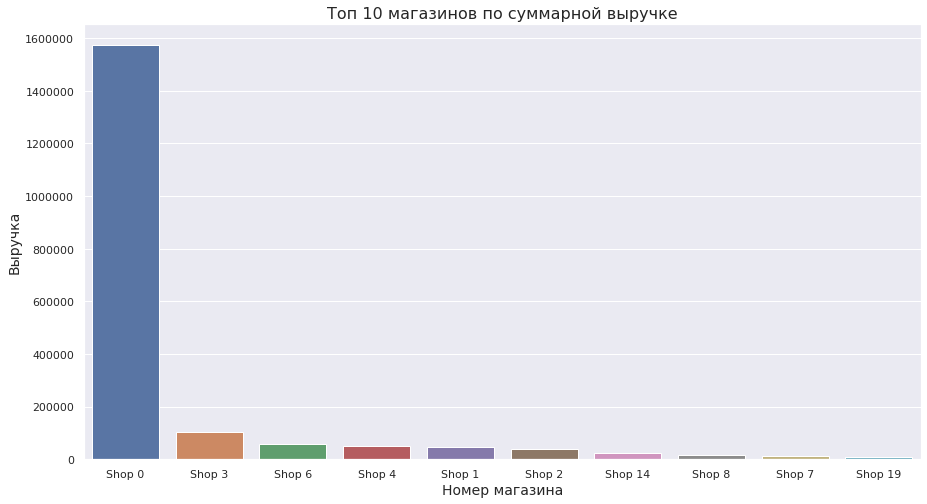

In [49]:
def barplots(data, x, y, title, xlabel, ylabel):
    ''' Функция выводит столбчатый график библиотеки seaborn'''
    ax = sns.barplot(data = data, x = x, y = y)
    ax.set_title(title, fontsize = 16)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14);

#построим график для датафрейма revenue_grouped     
barplots(revenue_grouped, 'shop_id', 'revenue', 
         'Топ 10 магазинов по суммарной выручке', 'Номер магазина', 'Выручка')

Самый продающий магазин - Shop 0, видимо, самый первый магазин, флагман сети. Его выручка в 15 раз выше ближайшего преследователя. Также выделяется Shop 3, остальные - сильно отстающие.

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Да уж, не самая стандартная картина. Но все верно расчитано.</div>

#### Рассчитать средний чек по магазинам, найти Топ 10 магазинов по среднему чеку, построить графики <a id = 'step2.3'></a>

Была мысль для расчета среднего чека отсеем возвраты и нулевые чеки из основного датафрейма. Но чек возврата - тоже чек, и прибыль магазина от таких чеков падает, это тоже нужно учесть.

Оставим только те магазины, в которых за все время выдано более 10 чеков. Это мало, по таким данным нежелательно делать какие-то выводы, но так их хотя бы 10 наберется.

In [50]:
#группировка методом groupby по id магазина
bill_grouped = retail_data.groupby('shop_id').agg({'purchase_id':'nunique'}).reset_index()
shop_list = bill_grouped.sort_values(by = 'purchase_id', ascending = False).reset_index(drop = True).head(10)
shop_list

,shop_id,purchase_id
0,Shop 0,4471
1,Shop 4,114
2,Shop 1,90
3,Shop 6,46
4,Shop 12,21
5,Shop 8,20
6,Shop 2,19
7,Shop 10,15
8,Shop 3,15
9,Shop 7,11


Список id топ магазинов:

In [51]:
shop_list_filtered = shop_list['shop_id'].sort_values().reindex([0,2,6,8,1,3,9,5,7,4])
shop_list_filtered

0     Shop 0
2     Shop 1
6     Shop 2
8     Shop 3
1     Shop 4
3     Shop 6
9     Shop 7
5     Shop 8
7    Shop 10
4    Shop 12
Name: shop_id, dtype: object

Построим сводную таблицу среднего чека по магазинам сети. Получим выборку данных по магазинам из списка:

In [52]:
#используем логическую индексацию loc
bill_data_filtered = retail_data.loc[retail_data['shop_id'].isin(shop_list_filtered)]
bill_data_filtered.head()

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.81,19.91
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.77,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.47,10.32
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.30,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.01,0.00


Создадим сводную таблицу:

In [53]:
#группировка методом groupby по id магазина
mean_bills = (bill_data_filtered.groupby(['shop_id', 'purchase_id']).agg(bill = ('buy_sum', 'sum')).reset_index())\
    .groupby('shop_id').agg(mean_bill = ('bill', 'mean')).sort_values(by = 'mean_bill', ascending = False)\
    .head(10).reset_index()
mean_bills

,shop_id,mean_bill
0,Shop 3,6931.73
1,Shop 2,2126.81
2,Shop 6,1229.04
3,Shop 7,1010.50
4,Shop 8,808.65
5,Shop 10,655.09
6,Shop 1,528.89
7,Shop 4,450.79
8,Shop 0,351.93
9,Shop 12,322.64


In [54]:
bill_data_filtered.loc[bill_data_filtered['shop_id'] == 'Shop 3']['purchase_id'].nunique()

15

Построим столбчатую диаграмму:

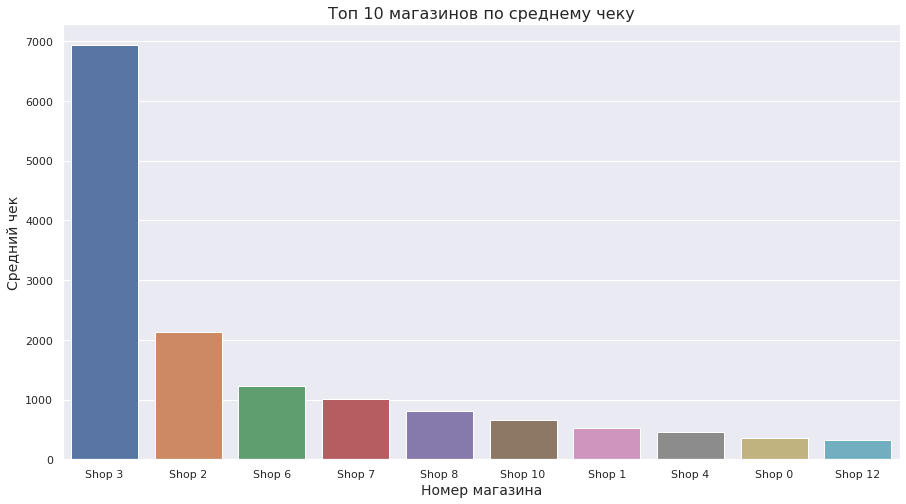

In [55]:
barplots(mean_bills, 'shop_id', 'mean_bill', 
         'Топ 10 магазинов по среднему чеку', 'Номер магазина', 'Средний чек')

Самые дорогие средние покупки в 3 магазине. Shop 3, судя по всему, находится где-то в районе местной Рублевки. Флагманский Shop 0 с трудом попал в Топ 10, возможно, большой поток покупателей разных целей и доходов несколько усреднил средний чек магазина.

Также стоит оценить динамику среднего чека по магазинам.

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Интересные идеи.</div>

Построим группировку по магазину и дате с накопительным средним:

In [56]:
sum_bill = bill_data_filtered.groupby(['shop_id', 'date']).agg(bill_sum = ('buy_sum', 'sum'), 
                                                               bill_count = ('purchase_id', 'nunique')).reset_index()
sum_bill['avg_bill'] = sum_bill['bill_sum'] / sum_bill['bill_count']

#создадим пустой список
dfs = []
#для каждого магазина в списке найдем накопительное среднее
for shop in sum_bill['shop_id'].unique():
    dfs.extend(sum_bill.loc[sum_bill['shop_id'] == shop]['avg_bill'].expanding().mean())
dfs = pd.DataFrame(dfs)

Объединим группировку с полученным списком:

In [57]:
#используем метод merge
sum_bill = sum_bill.merge(dfs, left_index = True, right_index = True)
#переименуем столбцы
sum_bill.columns = ['shop_id', 'date', 'bill_sum', 'bill_count', 'avg_bill', 'exp_bill']
sum_bill

,shop_id,date,bill_sum,bill_count,avg_bill,exp_bill
0,Shop 0,2016-12-01,62910.67,135,466.00,466.00
1,Shop 0,2016-12-02,30299.27,163,185.89,325.95
2,Shop 0,2016-12-03,30243.23,94,321.74,324.54
3,Shop 0,2016-12-05,40216.71,86,467.64,360.32
4,Shop 0,2016-12-06,48572.04,126,385.49,365.35
...,...,...,...,...,...,...
279,Shop 8,2017-02-01,341.47,1,341.47,751.98
280,Shop 8,2017-02-03,548.79,1,548.79,738.43
281,Shop 8,2017-02-09,804.17,1,804.17,742.54
282,Shop 8,2017-02-14,534.36,1,534.36,730.30


Проверим правдоподобность на Shop 3 (самом дорогом по среднему чеку):

In [58]:
sum_bill.loc[sum_bill['shop_id'] == 'Shop 3']

,shop_id,date,bill_sum,bill_count,avg_bill,exp_bill
162,Shop 3,2016-12-01,274.71,1,274.71,274.71
163,Shop 3,2016-12-20,39.93,1,39.93,157.32
164,Shop 3,2016-12-21,18388.43,1,18388.43,6234.35
165,Shop 3,2017-01-14,18631.78,1,18631.78,9333.71
166,Shop 3,2017-01-19,13956.53,1,13956.53,10258.27
167,Shop 3,2017-01-20,520.52,1,520.52,8635.32
168,Shop 3,2017-01-21,13183.10,1,13183.10,9285.00
169,Shop 3,2017-01-31,173.77,1,173.77,8146.10
170,Shop 3,2017-02-01,228.12,1,228.12,7266.32
171,Shop 3,2017-02-03,-54.62,1,-54.62,6534.23


Построим линейный график изменения срднего чека во времени:

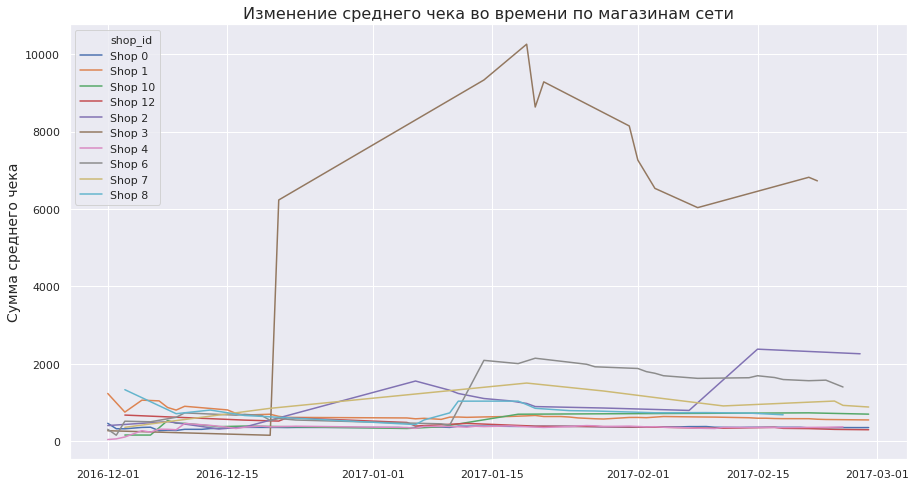

In [59]:
#линейный график из библиотеки seaborn
ax = sns.lineplot(data = sum_bill, x = 'date', y = 'exp_bill', hue = 'shop_id', ci = None)
ax.set_title('Изменение среднего чека во времени по магазинам сети', fontsize = 16)
plt.xlabel('', fontsize = 14)
plt.ylabel('Сумма среднего чека', fontsize = 14);

Большинство магазинов показывают достаточно стабильный средний чек. Выделяются Shop 2,3,6, но кол-во покупок в них не так велико, возможно влияние экстремально высоких чеков.

#### Рассчитать среднее кол-во товаров (SKU) в чеке по магазинам, построить графики <a id='step2.4'></a>

Аналогично предыдущим шагам, построим сводную таблицу. В зачет пойдут только магазины с 9+ покупками:

In [60]:
#двойная группировка методом groupby по id магазина
bills_count = (bill_data_filtered.groupby(['shop_id', 'purchase_id']).agg(sku = ('product_id', 'count')).reset_index())\
    .groupby('shop_id').agg(mean_sku = ('sku', 'mean')).sort_values(by = 'mean_sku', ascending = False)\
    .head(10).reset_index()
bills_count

,shop_id,mean_sku
0,Shop 3,32.80
1,Shop 7,28.36
2,Shop 8,28.00
3,Shop 6,22.39
4,Shop 0,21.55
5,Shop 10,19.93
6,Shop 1,17.11
7,Shop 4,15.25
8,Shop 2,13.26
9,Shop 12,13.24


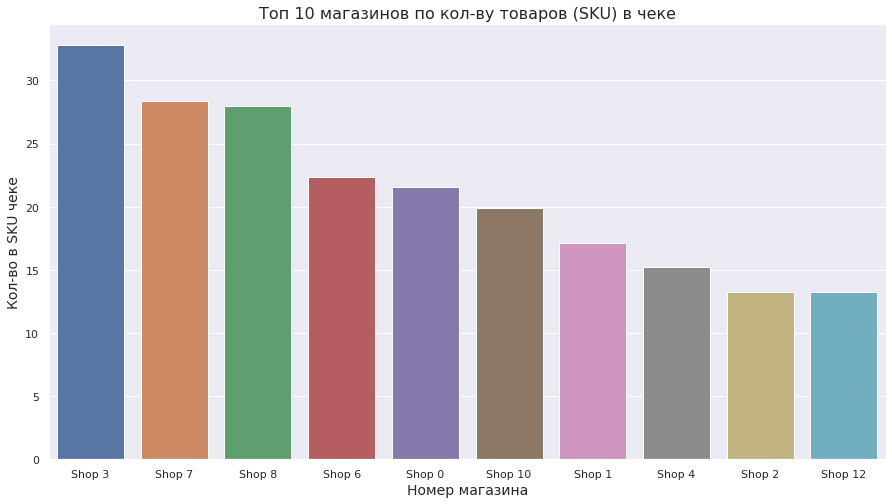

In [61]:
barplots(bills_count, 'shop_id', 'mean_sku', 
         'Топ 10 магазинов по кол-ву товаров (SKU) в чеке', 'Номер магазина', 'Кол-во в SKU чеке')

И снова в лидерах магазин номер 3. На данный момент это - самый эффективный магазин. Близки так же магазины 7 и 8.

#### Рассчитать среднее кол-во возвратов по магазинам, построить графики <a id='step2.5'></a>

Создадим выборку с отрицательным кол-вом товара в чеке и сформируем сводную таблицу. За один возврат будем считать один чек с любым кол-вом возвратов.

In [62]:
return_data = retail_data.loc[retail_data['buy_sum'] < 0]
print('Кол-во возвратов:', return_data['purchase_id'].nunique())

Кол-во возвратов: 979


Рассчитаем кол-во возвратов по магазинам:

In [63]:
mean_returns = return_data.groupby(['shop_id']).agg(count = ('purchase_id', 'nunique'))\
    .sort_values(by = 'count', ascending = False).reset_index()
mean_returns.head()

,shop_id,count
0,Shop 0,888
1,Shop 4,34
2,Shop 1,19
3,Shop 6,9
4,Shop 12,5


Абсолютное число возвратов не очень показательно, стоит рассчитать отношение возвратов к покупкам. Получим таблицу с покупками по магазинам:

In [64]:
mean_buys = retail_data.groupby(['shop_id']).agg(count = ('purchase_id', 'nunique'))\
    .sort_values(by = 'count', ascending = False).reset_index()
mean_buys.head()

,shop_id,count
0,Shop 0,4471
1,Shop 4,114
2,Shop 1,90
3,Shop 6,46
4,Shop 12,21


Объединим полученные таблицы:

In [65]:
#используем метод merge
buy_return_merged = pd.merge(mean_buys, mean_returns, on = 'shop_id', how = 'left')
buy_return_merged.columns = ['shop_id', 'buys', 'returns']
#добавим столбец с отношением возвратов к продажам
buy_return_merged['ratio, %'] = (buy_return_merged['returns'] / buy_return_merged['buys']) * 100
buy_return_merged.sort_values(by = 'ratio, %', ascending = False, inplace = True)
buy_return_merged.head(10).reset_index()

,index,shop_id,buys,returns,"ratio, %"
0,21,Shop 23,2,1.00,50.00
1,10,Shop 11,10,4.00,40.00
2,20,Shop 21,3,1.00,33.33
3,1,Shop 4,114,34.00,29.82
4,12,Shop 19,7,2.00,28.57
5,17,Shop 16,4,1.00,25.00
6,16,Shop 20,4,1.00,25.00
7,4,Shop 12,21,5.00,23.81
8,2,Shop 1,90,19.00,21.11
9,5,Shop 8,20,4.00,20.00


Посмотрим на магазины с минимальным кол-вом покупок не менее 10:

In [66]:
#выберем магазины только из нашего списка 
buy_return_merged = buy_return_merged.loc[buy_return_merged['shop_id'].isin(shop_list_filtered)]
buy_return_merged

,shop_id,buys,returns,"ratio, %"
1,Shop 4,114,34.00,29.82
4,Shop 12,21,5.00,23.81
2,Shop 1,90,19.00,21.11
5,Shop 8,20,4.00,20.00
7,Shop 10,15,3.00,20.00
0,Shop 0,4471,888.00,19.86
3,Shop 6,46,9.00,19.57
8,Shop 3,15,2.00,13.33
6,Shop 2,19,2.00,10.53
9,Shop 7,11,1.00,9.09


Построим столбчатую диаграмму:

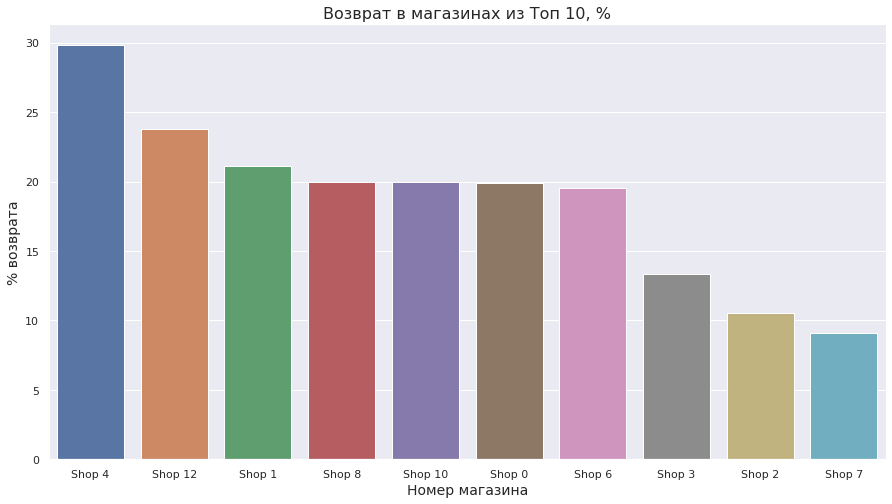

In [67]:
barplots(buy_return_merged, 'shop_id', 'ratio, %', 
         'Возврат в магазинах из Топ 10, %', 'Номер магазина', '% возврата')

Самый большой процент возврата в 4 магазине. Shop 3 и здесь в лидерах. Достаточно высокий коэффициент возврата и абсолютное число возвратов во флагманском магазине.

В целом, в нашей сети довольно большой процент возврата для строительного магазина. Нужно тщательнее выбирать поставщиков и следить за качеством товара. Консультантам, в свою очередь, корректнее консультировать покупателей при выборе товара.

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Странно, что 0-ой магазин делает так мало возвратов. Но все расчеты верны.</div>

#### Общие выводы по ключевым показателям <a id = 'step2.6'></a>

Были проведены исследования и построены графики по основным показателям эффективности магазинов розничной сети. Можно сделать следующие выводы:
- В сети присутствует один флагманский магазин Shop 0, локомотив продаж. На его долю приходится львиная доля всех покупок (около 75%);
- По большиству остальных показателей в лидерах Shop 3. Он обладает наивысшим средним чеком, динамикой роста среднего чека, самым большим кол-вом sku в чеке, низким процентом возврата. Я бы использовал эти преимущества и развивал этот магазин в будущем (расширение площади, увеличение ассортимента, различные акции);
- Достаточно высокие показатели также показывает Shop 6 (по многим показателям третье место в сети);
- В нашей сети довольно большой процент возврата для строительного магазина. Хорошо бы разобраться с причинами. Возможно, нужно тщательнее выбирать поставщиков и следить за качеством товара. Консультантам, в свою очередь, корректнее консультировать покупателей при выборе покупок.

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Выводы обоснованы.</div>

### Шаг 3. Проверка гипотез влияния участия в программе лояльности на ключевые показатели <a id='step3'></a>
[К содержанию](#contents)


В данном разделе будем проверять гипотезы как на очищенных данных, так и на "грязных". Присоединим к очищенному от выбросов датафрейму таблицу codes_filtered с усредненными ценами:

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Кстати, вот тут работа и с чистыми, и с грязными данными опрравдана.</div>

In [68]:
#объединим таблицы методом merge
retail_data_filtered = pd.merge(retail_filtered, codes_mean, on = 'product_id', how = 'left')
retail_data_filtered['buy_sum'] = retail_data_filtered['quantity'] * retail_data_filtered['mean_price']
display(retail_data_filtered.head())
print('Кол-во записей: {}'.format(len(retail_data_filtered)))

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.81,19.91
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.77,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.47,10.32
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.30,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.01,0.00


Кол-во записей: 99630


Посмотрим на датафрейм retail_data:

In [69]:
display(retail_data.head())
print('Кол-во записей: {}'.format(len(retail_data)))

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.81,19.91
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.77,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.47,10.32
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.30,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.01,0.00


Кол-во записей: 104302


#### Разделить все магазины на две группы (по участию в программе лояльности) <a id = 'step3.1'></a>

Для каждого набора данных создадим два датафрейма: с магазинами, участвующими в программе эффективности, и не входящими в нее:

In [70]:
#используем срезы данных методом query
retail_loyal = retail_data.query('loyalty_program == 1')
retail_unloyal = retail_data.query('loyalty_program == 0')
retail_filtered_loyal = retail_data_filtered.query('loyalty_program == 1')
retail_filtered_unloyal = retail_data_filtered.query('loyalty_program == 0')
#сформируем список полученных таблиц
df_list = [retail_loyal, retail_unloyal, retail_filtered_loyal, retail_filtered_unloyal]

Отобразим информацию о полученных датафреймах:

In [71]:
for df in df_list:
    display(df.head())
    display(df.info())

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.77,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.47,10.32
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.30,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.01,0.00
5,538379,22965,0,2016-12-12 11:26:00,22805,Shop 0,1,2016-12-12,3.07,0.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23412 entries, 1 to 104299
Data columns (total 10 columns):
purchase_id        23412 non-null int64
product_id         23412 non-null object
quantity           23412 non-null int64
purchase_date      23412 non-null datetime64[ns]
customer_id        23412 non-null int64
shop_id            23412 non-null object
loyalty_program    23412 non-null int64
date               23412 non-null datetime64[ns]
mean_price         23412 non-null float64
buy_sum            23412 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 2.0+ MB


None

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.81,19.91
6,540468,22189,0,2017-01-07 13:55:00,1,Shop 0,0,2017-01-07,5.28,0.00
7,541424,79321,1,2017-01-17 17:57:00,1,Shop 0,0,2017-01-17,7.01,7.01
8,538883,22891,0,2016-12-14 15:56:00,1,Shop 0,0,2016-12-14,6.19,0.00
11,541696,22197,4,2017-01-20 18:08:00,1,Shop 0,0,2017-01-20,1.21,4.86


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80890 entries, 0 to 104301
Data columns (total 10 columns):
purchase_id        80890 non-null int64
product_id         80890 non-null object
quantity           80890 non-null int64
purchase_date      80890 non-null datetime64[ns]
customer_id        80890 non-null int64
shop_id            80890 non-null object
loyalty_program    80890 non-null int64
date               80890 non-null datetime64[ns]
mean_price         80890 non-null float64
buy_sum            80890 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 6.8+ MB


None

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,2016-12-14,2.77,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,2016-12-14,1.47,10.32
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,2017-02-09,4.30,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,2017-02-13,7.01,0.00
5,538379,22965,0,2016-12-12 11:26:00,22805,Shop 0,1,2016-12-12,3.07,0.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22263 entries, 1 to 99627
Data columns (total 10 columns):
purchase_id        22263 non-null int64
product_id         22263 non-null object
quantity           22263 non-null int64
purchase_date      22263 non-null datetime64[ns]
customer_id        22263 non-null int64
shop_id            22263 non-null object
loyalty_program    22263 non-null int64
date               22263 non-null datetime64[ns]
mean_price         22263 non-null float64
buy_sum            22263 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 1.9+ MB


None

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,mean_price,buy_sum
0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,2016-12-10,1.81,19.91
6,540468,22189,0,2017-01-07 13:55:00,1,Shop 0,0,2017-01-07,5.28,0.00
7,541424,79321,1,2017-01-17 17:57:00,1,Shop 0,0,2017-01-17,7.01,7.01
8,538883,22891,0,2016-12-14 15:56:00,1,Shop 0,0,2016-12-14,6.19,0.00
11,541696,22197,4,2017-01-20 18:08:00,1,Shop 0,0,2017-01-20,1.21,4.86


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77367 entries, 0 to 99629
Data columns (total 10 columns):
purchase_id        77367 non-null int64
product_id         77367 non-null object
quantity           77367 non-null int64
purchase_date      77367 non-null datetime64[ns]
customer_id        77367 non-null int64
shop_id            77367 non-null object
loyalty_program    77367 non-null int64
date               77367 non-null datetime64[ns]
mean_price         77367 non-null float64
buy_sum            77367 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 6.5+ MB


None

Записей с участием в программе лояльности немногим больше 20%. Размеры выборок для тестов будут сильно отличаться. Это нежелательно, но выбора нет.

#### Определить, есть ли различие в среднем чеке для каждой группы <a id = 'step3.2'></a>

Найдем значения чеков для всех датафреймов:

In [72]:
loyal_bill = retail_loyal.groupby('purchase_id')['buy_sum'].sum()
unloyal_bill = retail_unloyal.groupby('purchase_id')['buy_sum'].sum()
loyal_filtered_bill = retail_filtered_loyal.groupby('purchase_id')['buy_sum'].sum()
unloyal_filtered_bill = retail_filtered_unloyal.groupby('purchase_id')['buy_sum'].sum()
#проверим на одном из полученных списков
loyal_bill.head()

purchase_id
536365   184.47
536366    20.40
536372    20.40
536373   384.53
536375   384.53
Name: buy_sum, dtype: float64

Для выбора статистического критерия проверим выборки на нормальность распределения. Напишем функцию для проверки четырех выборок:

In [73]:
def normal(norm_list):
    alpha = round(1 - (1 - 0.05)**(1/4), 3)
    for name in norm_list:
        normaltest = st.normaltest(name)
        print('p-значение: {:.3f}'.format(normaltest.pvalue))
        if (normaltest.pvalue < alpha):
            print(colored('Выборку нельзя считать нормально распределенной.', 'green'))
        else:
            print(colored('Выборку можно считать нормально распределенной.', 'red'))

In [74]:
#список исследуемых выборок
bill_list = [loyal_bill, unloyal_bill, loyal_filtered_bill, unloyal_filtered_bill]
normal(bill_list)

p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.


Так как выборки величины чеков не обладают нормальным распределением, применять тест Стьюдента не рекомендуется, для проверки равенства средних чеков применим ранговый тест Уилкоксона-Манна-Уитни, что снизит влияние выбросов.

Рассчитаем поправку Шидака для множественных сравнений, кол-во одновременно проводимых тестов - 2.

In [75]:
alpha_shd = round(1 - (1 - 0.05)**(1/2), 3)
alpha_shd

0.025

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Ого! Вот с 2 тестами уже можно смело брать что попроще - того же Бонфирони, результат тот же. </div>

<div class="alert alert-warning">
<b>Комментарий тимлида v2:</b> На самом деле нормлаьность данных имеет значение на выборках до 30 наблюдений. Но тем не менее это уже научный подход.

</div>

Сформируем гипотезы:

<i> 
- Гипотеза Н0 -  Средние чеки магазинов участвующих в программе лояльности, и не участвующих в ней, не различаются. <br>
- Альтернативная гипотеза Н1 - Средние чеки магазинов участвующих в программе лояльности, и не участвующих в ней, различны.

Напишем функцию для проведения теста Манна-Уитни:

In [76]:
def mw(loyal, unloyal, filt_loyal, filt_unloyal):
    
    ''' Функция для сравнения средних методом  Манна-Уитни '''
    
    alpha = alpha_shd # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу
        
    results = st.mannwhitneyu(loyal, unloyal)
    
    results_filt = st.mannwhitneyu(filt_loyal, filt_unloyal)
    
    print('p-значение: {:.3f}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print(colored('Средние значения выборок по участию в программе лояльности различаются,\
 мы смогли отвергнуть нулевую гипотезу.', 'green'))
    else:
        print(colored('Средние значения выборок по участию в программе лояльности не различаются,\
 мы не смогли отвергнуть нулевую гипотезу.', 'red'))
        
    print('p-значение filtered: {:.3f}'.format(results_filt.pvalue))
    if (results_filt.pvalue < alpha):
        print(colored('Средние значения выборок по участию в программе лояльности различаются,\
 мы смогли отвергнуть нулевую гипотезу.', 'green'))
    else:
        print(colored('Средние значения выборок по участию в программе лояльности не различаются,\
 мы не смогли отвергнуть нулевую гипотезу.', 'red'))

Проведем тесты на наших выборках:

In [77]:
mw(loyal_bill, unloyal_bill, loyal_filtered_bill, unloyal_filtered_bill)

p-значение: 0.000
Средние значения выборок по участию в программе лояльности различаются, мы смогли отвергнуть нулевую гипотезу.
p-значение filtered: 0.021
Средние значения выборок по участию в программе лояльности различаются, мы смогли отвергнуть нулевую гипотезу.


Проверим на вычисленных средних значениях. Изначальные данные:

In [78]:
(retail_data.groupby(['purchase_id', 'loyalty_program']).agg({'buy_sum': 'sum'}).reset_index())\
    .groupby('loyalty_program').agg(mean_bill = ('buy_sum', 'mean')).reset_index()

,loyalty_program,mean_bill
0,0,387.61
1,1,462.85


Очищенные данные:

In [79]:
(retail_data_filtered.groupby(['purchase_id', 'loyalty_program']).agg({'buy_sum': 'sum'}).reset_index())\
    .groupby('loyalty_program').agg(mean_bill = ('buy_sum', 'mean')).reset_index()

,loyalty_program,mean_bill
0,0,232.96
1,1,263.38


Судя по полученным средним значениям, средний чек у участников программы лояльности выше, тест подтверждает это различие.

#### Определить, есть ли различие в кол-ве SKU в чеке для каждой группы <a id ='step3.3'></a>

Сгруппируем данные по среднему кол-ву наименований товара в чеке по магазинам:

In [80]:
loyal_sku = retail_loyal.groupby('purchase_id')['product_id'].count()
unloyal_sku = retail_unloyal.groupby('purchase_id')['product_id'].count()
loyal_filtered_sku = retail_filtered_loyal.groupby('purchase_id')['product_id'].count()
unloyal_filtered_sku = retail_filtered_unloyal.groupby('purchase_id')['product_id'].count()
#проверим результат на одном из списков
loyal_sku.head()

purchase_id
536365     7
536366     2
536372     2
536373    16
536375    16
Name: product_id, dtype: int64

Проверим выборки на нормальность распределения:

In [81]:
sku_list = [loyal_sku, unloyal_sku, loyal_filtered_sku, unloyal_filtered_sku]
normal(sku_list)

p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.


Судя по тесту, у нас недостаточно оснований считать выборки нормально распределенными. Целеобразно провести Проведем тест Манна-Уитни:

<div class="alert alert-danger">
<b>Комментарий тимлида:</b> Тут также нужно объяснение твоего выбора статистического критерия. </div>

<div class="alert alert-info">
<b>Комментарий студента:</b> И в первом тесте нужно, везде изменил. </div>

<div class="alert alert-success">
<b>Комментарий тимлида v2:</b> Вижу.

</div>

In [82]:
mw(loyal_sku, unloyal_sku, loyal_filtered_sku, unloyal_filtered_sku)

p-значение: 0.000
Средние значения выборок по участию в программе лояльности различаются, мы смогли отвергнуть нулевую гипотезу.
p-значение filtered: 0.000
Средние значения выборок по участию в программе лояльности различаются, мы смогли отвергнуть нулевую гипотезу.


Для проверки можно попробовать провести тест Стьюдента и сравнить результаты:

Сначала проверим различны ли дисперсии выборок, чтобы понять, взяты ли они из одинаковых по параметрам совокупностей. Для этого напишем функцию:

In [83]:
def levene(loyal, unloyal, filt_loyal, filt_unloyal):
    
    ''' Функция для сравнения дисперский выборок '''
    
    alpha = alpha_shd # критический уровень статзначимости,если p-value < alpha - отвергнем гипотезу
    results = st.levene(loyal, unloyal)
    results_filt = st.levene(filt_loyal, filt_unloyal)
    
    print('p-значение: {:.3f}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print(colored('Дисперсии выборок различаются, мы смогли отвергнуть нулевую гипотезу.', 'green'))
    else:
        print(colored('Дисперсии выборок не различаются, мы не смогли отвергнуть нулевую гипотезу.', 'red'))
        
    print('p-значение filtered: {:.3f}'.format(results_filt.pvalue))
    if (results_filt.pvalue < alpha):
        print(colored('Дисперсии выборок различаются, мы смогли отвергнуть нулевую гипотезу.', 'green'))
    else:
        print(colored('Дисперсии выборок не различаются, мы не смогли отвергнуть нулевую гипотезу.', 'red'))

Проведем тест Левена для группировок среднего чека. Сформируем гипотезы:
<i>
- Гипотеза Н0 - Дисперсии чеков магазинов участвующих в программе лояльности, и не участвующих в ней, не различаются. <br>
- Альтернативная гипотеза Н1 - Дисперсии чеков магазинов участвующих в программе лояльности, и не участвующих в ней, различны.

In [84]:
levene(loyal_sku, unloyal_sku, loyal_filtered_sku, unloyal_filtered_sku)

p-значение: 0.000
Дисперсии выборок различаются, мы смогли отвергнуть нулевую гипотезу.
p-значение filtered: 0.000
Дисперсии выборок различаются, мы смогли отвергнуть нулевую гипотезу.


Дисперсии можем считать различными, проведем ttest. Сформируем гипотезы:
<i> 
- Гипотеза Н0 -  Средние кол-во sku в чеках магазинов, участвующих в программе лояльности, и не участвующих в ней, не различаются. <br>
- Альтернативная гипотеза Н1 - Средние кол-во sku в чеках магазинов, участвующих в программе лояльности, и не участвующих в ней, различны.

Напишем функцию для проведения множественных t-тестов:

In [85]:
def ttests(loyal, unloyal, filt_loyal, filt_unloyal, equal, equal_filt):
    
    ''' Функция для сравнения средних методом t-теста '''
    
    alpha = alpha_shd # критический уровень статистической значимости
                # если p-value окажется меньше него - отвергнем гипотезу
        
    results = st.ttest_ind(loyal, unloyal, equal_var = equal)
    
    results_filt = st.ttest_ind(filt_loyal, filt_unloyal, equal_var = equal_filt)
    
    print('p-значение: {:.3f}'.format(results.pvalue))
    if (results.pvalue < alpha):
        print(colored('Средние значения выборок по участию в программе лояльности различаются,\
 мы смогли отвергнуть нулевую гипотезу.', 'green'))
    else:
        print(colored('Средние значения выборок по участию в программе лояльности не различаются,\
 мы не смогли отвергнуть нулевую гипотезу.', 'red'))
        
    print('p-значение filtered: {:.3f}'.format(results_filt.pvalue))
    if (results_filt.pvalue < alpha):
        print(colored('Средние значения выборок по участию в программе лояльности различаются,\
 мы смогли отвергнуть нулевую гипотезу.', 'green'))
    else:
        print(colored('Средние значения выборок по участию в программе лояльности не различаются,\
 мы не смогли отвергнуть нулевую гипотезу.', 'red'))

Проведем t-тест на наших выборках:

In [86]:
ttests(loyal_sku, unloyal_sku, loyal_filtered_sku, unloyal_filtered_sku, False, False)

p-значение: 0.000
Средние значения выборок по участию в программе лояльности различаются, мы смогли отвергнуть нулевую гипотезу.
p-значение filtered: 0.000
Средние значения выборок по участию в программе лояльности различаются, мы смогли отвергнуть нулевую гипотезу.


Тест говорит о различии среднего кол-ва sku в чеках. Причем как по первоначальным данным, так и по очищенным. Результаты тестов по различным критериям сходятся. Проверим, в какую сторону, вычислим средние значения по выборкам. Для "грязных" данных:

In [87]:
(retail_data.groupby(['purchase_id', 'loyalty_program']).agg({'product_id': 'count'}).reset_index())\
    .groupby('loyalty_program').agg(sku_count = ('product_id', 'mean')).reset_index()

,loyalty_program,sku_count
0,0,22.79
1,1,17.42


Для очищенных данных:

In [88]:
(retail_data_filtered.groupby(['purchase_id', 'loyalty_program']).agg({'product_id': 'count'}).reset_index())\
    .groupby('loyalty_program').agg(sku_count = ('product_id', 'mean')).reset_index()

,loyalty_program,sku_count
0,0,23.97
1,1,17.57


Действительно, кол-во товаров в чеках достаточно сильно отличается. Неожиданно то, что для участников программы лояльности это кол-во ниже. По данному критерию программу эффективности можно считать неэффективной.

#### Определить, есть ли различие в среднем кол-ве покупок для групп <a id='step3.4'></a>

Сгруппируем данные по среднему кол-ву покупок в чеке по магазинам, удалим пользователя с id = 1:

In [89]:
loyal_buys = retail_loyal.query('customer_id != 1').groupby('customer_id')['purchase_id'].nunique()
unloyal_buys = retail_unloyal.query('customer_id != 1').groupby('customer_id')['purchase_id'].nunique()
loyal_filtered_buys = retail_filtered_loyal.query('customer_id != 1').groupby('customer_id')['purchase_id'].nunique()
unloyal_filtered_buys = retail_filtered_unloyal.query('customer_id != 1').groupby('customer_id')['purchase_id'].nunique()
#проверис результат на одном из списков
loyal_buys.head()

customer_id
22005    2
22006    2
22011    1
22012    3
22018    1
Name: purchase_id, dtype: int64

Аналогично проведем тестирование выборок на нормальность распределения:

In [90]:
buy_list = [loyal_buys, unloyal_buys, loyal_filtered_buys, unloyal_filtered_buys]
normal(buy_list)

p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.
p-значение: 0.000
Выборку нельзя считать нормально распределенной.


Все так же нет оснований считать наши выборки нормального распределенными. Отдадим приоритет критерию Манна-Уитни, но проведем также и t-тест Стьюдента:

In [91]:
mw(loyal_buys, unloyal_buys, loyal_filtered_buys, unloyal_filtered_buys)

p-значение: 0.178
Средние значения выборок по участию в программе лояльности не различаются, мы не смогли отвергнуть нулевую гипотезу.
p-значение filtered: 0.217
Средние значения выборок по участию в программе лояльности не различаются, мы не смогли отвергнуть нулевую гипотезу.


Проведем тест Левена для группировок кол-ва sku. Сформируем гипотезы:
<i>
- Гипотеза Н0 - Дисперсии кол-ва покупок на одного покупателя для магазинов участвующих в программе лояльности, и не участвующих в ней, не различаются. <br>
- Альтернативная гипотеза Н1 - Дисперсии кол-ва покупок на одного покупателя для магазинов участвующих в программе лояльности, и не участвующих в ней, различны.

In [92]:
levene(loyal_buys, unloyal_buys, loyal_filtered_buys, unloyal_filtered_buys)

p-значение: 0.419
Дисперсии выборок не различаются, мы не смогли отвергнуть нулевую гипотезу.
p-значение filtered: 0.418
Дисперсии выборок не различаются, мы не смогли отвергнуть нулевую гипотезу.


Можно считать, что выборки взяты из одинаковых по параметрам совокупностей, проведем ttest. Сформируем гипотезы:
<i> 
- Гипотеза Н0 -  Среднее кол-во покупок на одного покупателя в магазинах, участвующих в программе лояльности, и не участвующих в ней, не различаются. <br>
- Альтернативная гипотеза Н1 - Среднее кол-во покупок на одного покупателя в магазинах, участвующих в программе лояльности, и не участвующих в ней, различны.

In [93]:
ttests(loyal_buys, unloyal_buys, loyal_filtered_buys, unloyal_filtered_buys, True, True)

p-значение: 0.419
Средние значения выборок по участию в программе лояльности не различаются, мы не смогли отвергнуть нулевую гипотезу.
p-значение filtered: 0.418
Средние значения выборок по участию в программе лояльности не различаются, мы не смогли отвергнуть нулевую гипотезу.


Результаты обоих тестов говорят о том, что различие в среднем кол-ве покупок на покупателя нельзя считать статистически значимым. Проверим на средних значениях:

In [94]:
(retail_data.query('customer_id != 1').groupby(['customer_id', 'loyalty_program']).agg({'purchase_id': 'nunique'})\
 .reset_index()).groupby('loyalty_program').agg(mean_buys = ('purchase_id', 'mean')).reset_index()

,loyalty_program,mean_buys
0,0,2.41
1,1,2.29


In [95]:
(retail_data_filtered.query('customer_id != 1').groupby(['customer_id', 'loyalty_program']).agg({'purchase_id': 'nunique'})\
 .reset_index()).groupby('loyalty_program').agg(mean_buys = ('purchase_id', 'mean')).reset_index()

,loyalty_program,mean_buys
0,0,2.34
1,1,2.22


Действительно, разница минимальная. Кол-во покупок для участников программы лояльности даже ниже.

#### Сделать выводы: как программа лояльности влияет на эффективность магазинов <a id='step3.5'></a>

Проведенные тесты показали, что программа лояльности могла бы быть более эфективной.
- абсолютный показатель среднего чека для группы лояльности выше, чем для пользователей, не входящих в нее. Тест Манна-Уитни подтверждает, что различия статистически значимы;
- Кол-во sku в чеке для участников программы лояльности заметно ниже, чем для обычных покупателей;
- Среднее кол-во покупок для обеих групп примерно равно

По основному проверенному критерию, среднему чеку, программа лояльности показывает некоторую эффективность. Но, в целом, можно сказать, что программу эффективности неплохо бы было доработать, изменить ее условия, бонусы и скидки для ее участников.

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Ты очень осторожно высказался о программе лояльности - и это правильно. Действительно, мы не исследовали все вомзожные параметры ее работы - например, частоту покупок и срок "жизни" покупателя. </div>

### Шаг 4. Общие выводы по работе <a id='step4'></a>
[К содержанию](#contents)

- <b>В</b> первой части работы были загружены исходные датафреймы, заменены названия признаков, удалены пропуски и дубликаты. Где необходимо, изменен тип данных на корректный. Добавлены признаки (дата покупки).
- <b>В</b> исследовательской части проведена работа с выбросами. Удалены выбросы в признаке 'quantity' (кол-во товара одной sku в чеке). В датафрейме с ценами codes для каждой sku была найдена усредненная цена.
- <b>П</b>роведены исследования по выявлению лучших магазинов по ключевым показателям эффективности. Особенно выделяются два магазина: флагманский Shop 0 с самой большой выручкой, которая составляет более 75% от выручки всей сети, и Shop 3 - лидер по показателям среднего чека, кол-ва sku в чеке и низким процентом возврата. Следует обратить внимание на этот магазин для дальнейшего развития. Также неплохо выглядит Shop 6.
- <b>В</b> нашей сети высокий процент возврата. Это требует углубленного исследования. Возможно, стоит тщательнее выбирать поставщиков и следить за качеством товара. Консультантам, в свою очередь, корректнее консультировать покупателей при выборе товара.
- <b>П</b>роведены тесты влияния эффективности программы лояльности. Проведенные тесты показали, что программа лояльности могла бы быть более эффективной.
    * абсолютный показатель среднего чека для группы лояльности выше, чем для пользователей, не входящих в нее. Тест Манна-Уитни подтверждает, что различия статистически значимы;
    * Кол-во sku в чеке для участников программы лояльности заметно ниже, чем для обычных покупателей;
    * Среднее кол-во покупок для обеих групп примерно равно. В целом, можно сказать, что программу эффективности неплохо бы было доработать, изменить ее условия, бонусы и скидки для ее участников.
- <b>В</b> качестве основной метрики для измерения эффективности магазинов предлагаю использовать средний чек. В качестве дополнительной - кол-во sku в чеке. Это наиболее явные и не сильно зависящие от размера магазина и объема продаж метрики. Измерение по объему выручки для нашей сети с сильно различающимся по размерам (как видно по исходным данным) магазинами, малоинформативно. 

<div class="alert alert-danger">
<b>Комментарий тимлида:</b> В выводе отсутсвует главное - как стоит дальше измерять эффективность магазинов? Какой метрикой? </div>

<div class="alert alert-success">
<b>Комментарий тимлида v2:</b> Хороший выбор метрик.

</div>

<div class="alert alert-success">
<b>Комментарий тимлида:</b> Очень хорошая работа. Внимательность и бережность к данным, проверка предположений на данных, отличное знание статистики, верные выводы. Осталось прояснить 2 момента:

* Объяснить выбор статистического критерия.
* Указать, какой же метрикой нужно измерять эффективность магазинов.

</div>

<div class="alert alert-info">
<b>Комментарий студента:</b> Исправил, добавил ссылки на презентацию и дашборд в начале работы. </div>